# Seasonal anomalies from a 30-year baseline climatological seasonal cycle

Seasonal departure from climatological seasonal cycle of a specific time window

Jiwoo Lee (LLNL), 2023-1-23

In [1]:
import xcdat as xc
import matplotlib.pyplot as plt

## Load input data

In [2]:
# input file (monthly sea surface temperature) downloaded from MetOffice (https://www.metoffice.gov.uk/hadobs/hadisst/data/HadISST_sst.nc.gz)
infile = "/Users/lee1043/Documents/Research/DATA/HadISST/HadISST_sst.nc"  

In [3]:
ds = xc.open_dataset(infile)  # climatology of subsetted data (time: 1810, latitude: 180, longitude: 360)

In [4]:
ds

<xarray.Dataset>
Dimensions:         (time: 1810, bnds: 2, latitude: 180, longitude: 360)
Coordinates:
  * time            (time) object 1870-01-16 11:59:59.505615 ... 2020-10-16 1...
  * latitude        (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude       (longitude) float32 -179.5 -178.5 -177.5 ... 178.5 179.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds       (time, bnds) object 1870-01-01 17:59:59.588012 ... 2020-1...
    sst             (time, latitude, longitude) float32 ...
    longitude_bnds  (longitude, bnds) float32 -180.0 -179.0 ... 179.0 180.0
    latitude_bnds   (latitude, bnds) float32 90.0 89.0 89.0 ... -89.0 -90.0
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    10/12/2020 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

In [5]:
data_var = 'sst'  #  name of data variable

In [6]:
ds[data_var] = ds[data_var].where(ds[data_var] >= -0.5)  # exclude missing value

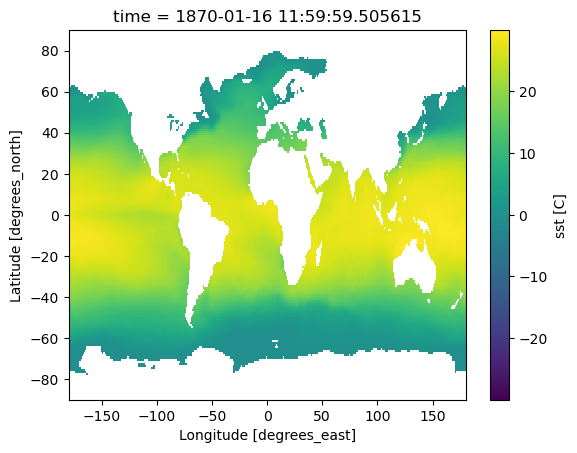

In [7]:
ds[data_var].isel(time=slice(0,1)).plot(cmap='viridis')

## Get seasonal average of the full time series

In [8]:
ds_season = ds.temporal.group_average(data_var, freq="season")
ds_season

<xarray.Dataset>
Dimensions:         (latitude: 180, longitude: 360, bnds: 2, time: 604)
Coordinates:
  * latitude        (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude       (longitude) float32 -179.5 -178.5 -177.5 ... 178.5 179.5
  * time            (time) object 1870-01-01 00:00:00 ... 2020-10-01 00:00:00
Dimensions without coordinates: bnds
Data variables:
    longitude_bnds  (longitude, bnds) float32 -180.0 -179.0 ... 179.0 180.0
    latitude_bnds   (latitude, bnds) float32 90.0 89.0 89.0 ... -89.0 -90.0
    sst             (time, latitude, longitude) float64 nan nan nan ... nan nan
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    10/12/2020 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

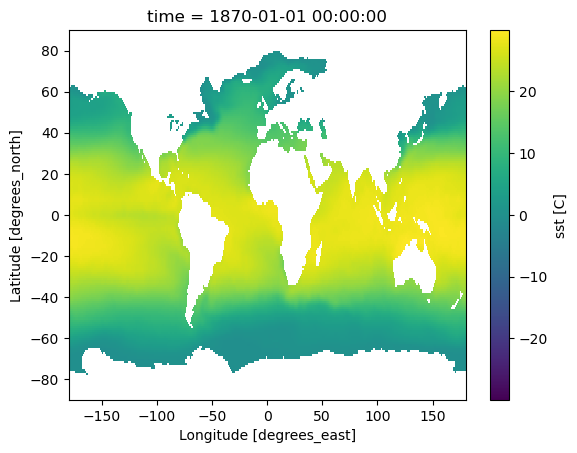

In [9]:
ds_season[data_var].isel(time=0).plot(cmap='viridis')

## Temporal subset of original dataset to get reference climatology from the baseline time window

In [10]:
ds_reference = ds.sel(time=slice("1971-01-01", "2000-12-31"))  # time subsetted data

In [11]:
ds_clim = ds_reference.temporal.climatology(data_var, freq="season")  # climatology of subsetted data

In [12]:
ds_clim

<xarray.Dataset>
Dimensions:         (latitude: 180, longitude: 360, bnds: 2, time: 4)
Coordinates:
  * latitude        (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude       (longitude) float32 -179.5 -178.5 -177.5 ... 178.5 179.5
  * time            (time) object 0001-01-01 00:00:00 ... 0001-10-01 00:00:00
Dimensions without coordinates: bnds
Data variables:
    longitude_bnds  (longitude, bnds) float32 -180.0 -179.0 ... 179.0 180.0
    latitude_bnds   (latitude, bnds) float32 90.0 89.0 89.0 ... -89.0 -90.0
    sst             (time, latitude, longitude) float64 nan nan nan ... nan nan
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    10/12/2020 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

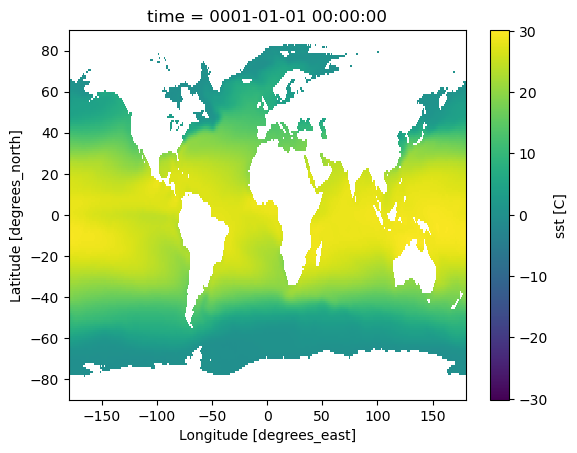

In [13]:
ds_clim[data_var].isel(time=0).plot(cmap='viridis')

## Anomaly calculation

* Get departure by subtracting the climatological seasonal cycle, `ds_clim`, from the seasonal average time series, `ds_season`.
* Note that `ds_clim` has 4 time points while `ds_season` has much more time points (i.e., N = original time points from `ds` / 4).
* Thus, number of time points from `ds_clim` needs to grow to match that of `ds_season` to conduct subtraction.

In [14]:
import numpy as np

In [15]:
# Length of time dimension in `ds_season`
num_time_step_1 = len(ds_season[data_var].time)
num_time_step_1

604

In [16]:
# Length of time dimension in `ds_clim`
num_time_step_2 = len(ds_clim[data_var].time)
num_time_step_2

4

In [17]:
# Number of repeat to grow (i.e., extend) `ds_clim`
repeat_N = int(num_time_step_1 / num_time_step_2)
repeat_N

151

In [18]:
# Repeat `ds_clim` using numpy tile along time dimension
np_array = np.tile(
    ds_clim[data_var].to_numpy(),
    (repeat_N, 1, 1)
)

In [19]:
# Check dimension shape
np_array.shape

(604, 180, 360)

In [20]:
import xarray as xr

xr_data_arr = xr.DataArray(
    np_array, 
    dims=['time', 'latitude', 'longitude'])  # use existing dimensions in `ds_season` dataset

ds_season['clim_seasonal_cycle_grown'] = xr_data_arr

In [21]:
# add the anomaly data variable to `ds_season` dataset
ds_season[data_var+'_departure'] = ds_season[data_var] - ds_season['clim_seasonal_cycle_grown']

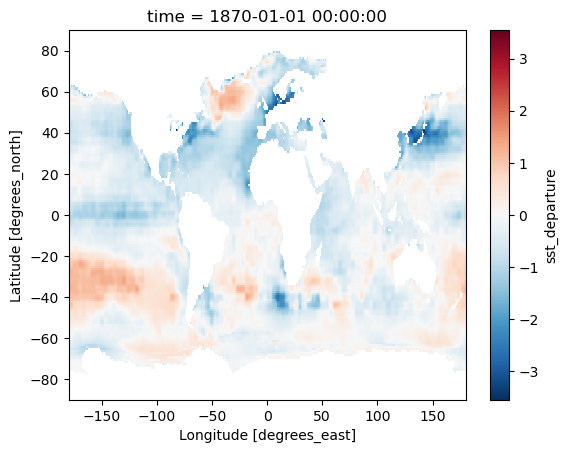

In [22]:
ds_season[data_var+'_departure'].isel(time=0).plot()

## Check result

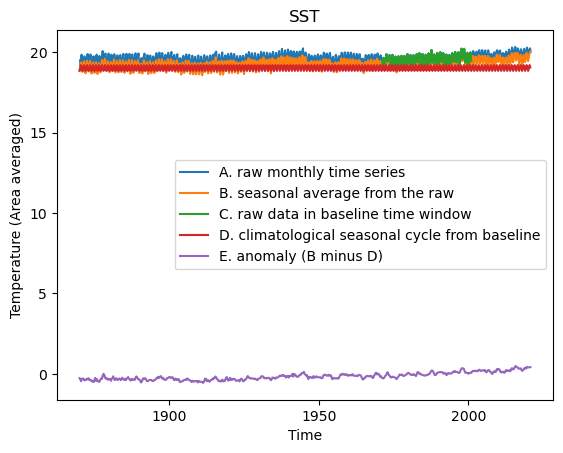

In [23]:
# plot

# original dataset
ds.spatial.average(data_var)[data_var].plot.line(label='A. raw monthly time series')
ds_season.spatial.average(data_var)[data_var].plot.line(label='B. seasonal average from the raw')

# subsetted for reference period 
ds_reference.spatial.average(data_var)[data_var].plot.line(label='C. raw data in baseline time window')
ds_season.spatial.average('clim_seasonal_cycle_grown')['clim_seasonal_cycle_grown'].plot.line(label='D. climatological seasonal cycle from baseline')

# departure
ds_season.spatial.average(data_var+'_departure')[data_var+'_departure'].plot.line(label='E. anomaly (B minus D)')

plt.ylabel('Temperature (Area averaged)')
plt.title('SST')
plt.legend()
plt.savefig('plot2.png')